In [18]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import *
# import itertools
# import astropy.units as u
# import astropy.constants as const
# import time
# from tqdm import tqdm

imf_type = 0

imf_types = ['Salpeter (1955)', 'Chabrier (2003)', 'Kroupa (2001)', 'van Dokkum (2008)', 'Dave (2008)']

grid_ranges, run_params = getParams(imf_type=imf_type, len_logz=100, len_dust=6, len_tage=100, dust=True)
a = 1.0 + run_params['zred']

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

num_models = len(logzs)*len(dusts)*len(tages)

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

In [19]:
data_grid_params = np.load(f'params_imf_{imf_type}_{num_models}.npy')
data_grid_spec = np.load(f'specs_imf_{imf_type}_{num_models}.npy')
data_grid_breaks_Anna = np.load(f'breaks_Anna_imf_{imf_type}_{num_models}.npy')
data_grid_breaks_D4000 = np.load(f'breaks_D4000_imf_{imf_type}_{num_models}.npy')

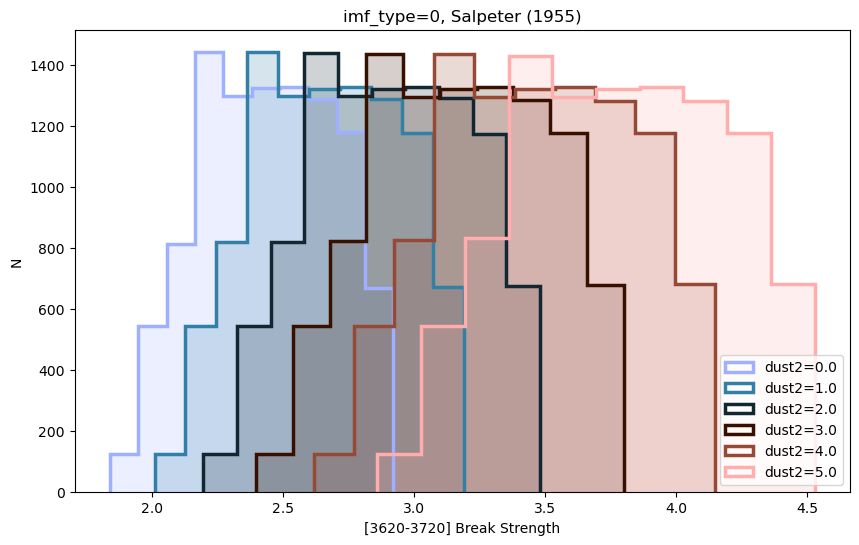

In [20]:
color = cm.berlin(np.linspace(0,1,len(dusts)))

figure(figsize=(10,6))

i_logz,i_dust,i_tage = 0,0,0

for i_dust in range(len(dusts)):

    hist(data_grid_breaks_Anna[:,i_dust,:,0].ravel(), color=color[i_dust], linewidth=2.5, histtype='step', label=f'dust2={dusts[i_dust]}')
    hist(data_grid_breaks_Anna[:,i_dust,:,0].ravel(), color=color[i_dust], alpha=.2, histtype='stepfilled')
    

xlabel('[3620-3720] Break Strength')
ylabel('N')

title_text = f'imf_type={imf_type}, {imf_types[imf_type]}'

title(title_text)

legend()

# savefig(f'hist_break_strengths_imf_{imf_type}.png')

show()